
# Project: Medical Appointment No-shows

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">Limitations</a></li>
<li><a href="#reference">Reference</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project, a data set of appointment records in public hospital at Victoria, Brazil is investiagetd. The reason why the patient did not show up attracts out attention. This data set contains records whether patients miss appointments, attributes of patients and information about appointments. The data set is provided on Kaggle.

>Given the information and attributes about a patient and his/her scheduled appointment, how likely is he/she to show up to the appointment as scheduled?
>Throughout this project, we are trying to answer this question by exploring the data set and also the connections among variables.

#### Questions
> 1.How many patients missed their Appointments?

> 2.Does the age of the patient affect the likelihood of no-show appointment?

> 3.Which Gender has a higher No Show?

> 4.Do patients with scholarship have a higher no-show to appointments?

In [63]:
# import all packages 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [64]:
# Load data
no_show= pd.read_csv(r'C:\Users\Mbelesoft PC1\Desktop\KaggleV2-May-2016.csv') 
no_show.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [65]:
#Performing operations to inspect data
no_show.shape

(110527, 14)

In [66]:
no_show.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [67]:
no_show.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### Data Cleaning
>1. Check for any duplicates and change an inconsistency in the data
>2. Data type for ScheduledDay and Appointment Day to change to DateTime
>3. Renaming incorrect columns.

In [68]:
#Renaming some columns 
no_show=no_show.rename(columns={'ScheduledDay':'ScheduledDate', 'AppointmentDay':'AppointmentDate'})
no_show.head(3)


,PatientId,AppointmentID,Gender,ScheduledDate,AppointmentDate,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [69]:
#Renaming some column names that had spelling errors
no_show=no_show.rename(columns={'Hipertension':'Hypertension', 'Handcap':'Handicap','No-show':'Noshow'})
no_show.head(3)

,PatientId,AppointmentID,Gender,ScheduledDate,AppointmentDate,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Noshow
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [70]:
#looking for instances of missing values
no_show.isnull().any() 
#no missing values

PatientId          False
AppointmentID      False
Gender             False
ScheduledDate      False
AppointmentDate    False
Age                False
Neighbourhood      False
Scholarship        False
Hypertension       False
Diabetes           False
Alcoholism         False
Handicap           False
SMS_received       False
Noshow             False
dtype: bool

In [71]:
#finding duplicates
no_show.duplicated().sum() #no duplicates

0

In [34]:
#find more details and see data types in each columns 
no_show.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   PatientId        110527 non-null  int64 
 1   AppointmentID    110527 non-null  int64 
 2   Gender           110527 non-null  object
 3   ScheduledDate    110527 non-null  object
 4   AppointmentDate  110527 non-null  object
 5   Age              110527 non-null  int64 
 6   Neighbourhood    110527 non-null  object
 7   Scholarship      110527 non-null  int64 
 8   Hypertension     110527 non-null  int64 
 9   Diabetes         110527 non-null  int64 
 10  Alcoholism       110527 non-null  int64 
 11  Handicap         110527 non-null  int64 
 12  SMS_received     110527 non-null  int64 
 13  Noshow           110527 non-null  object
dtypes: int64(9), object(5)
memory usage: 11.8+ MB


In [72]:
#convert 'ScheduleDate' and 'AppointmentDate' from object type to datetime 64[ns]
no_show['ScheduledDate'] = pd.to_datetime(no_show['ScheduledDate']).dt.date.astype('datetime64[ns]')
no_show['AppointmentDate'] = pd.to_datetime(no_show['AppointmentDate']).dt.date.astype('datetime64[ns]')

In [46]:
no_show.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Gender           110527 non-null  object        
 1   ScheduledDate    110527 non-null  datetime64[ns]
 2   AppointmentDate  110527 non-null  datetime64[ns]
 3   Age              110527 non-null  int64         
 4   Neighbourhood    110527 non-null  object        
 5   Scholarship      110527 non-null  int64         
 6   Hypertension     110527 non-null  int64         
 7   Diabetes         110527 non-null  int64         
 8   Alcoholism       110527 non-null  int64         
 9   Handicap         110527 non-null  int64         
 10  SMS_received     110527 non-null  int64         
 11  Noshow           110527 non-null  object        
 12  Age_group        106987 non-null  category      
dtypes: category(1), datetime64[ns](2), int64(7), object(3)
memory usage: 10.2+

In [73]:
# Check if all PatientsIds are in integer
non_int_patient_ids = no_show[~ no_show.PatientId.apply(lambda x: x.is_integer())]
print('There are {} patients_ids that are not integers'.format(len(non_int_patient_ids)))
non_int_patient_ids

There are 5 patients_ids that are not integers


,PatientId,AppointmentID,Gender,ScheduledDate,AppointmentDate,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Noshow
3950,93779.52927,5712759,F,2016-05-18,2016-05-18,33,CENTRO,0,0,0,0,0,0,No
73228,537615.28476,5637728,F,2016-04-29,2016-05-06,14,FORTE SÃO JOÃO,0,0,0,0,0,1,No
73303,141724.16655,5637648,M,2016-04-29,2016-05-02,12,FORTE SÃO JOÃO,0,0,0,0,0,0,No
100517,39217.84439,5751990,F,2016-05-31,2016-06-03,44,PRAIA DO SUÁ,0,0,0,0,0,0,No
105430,43741.75652,5760144,M,2016-06-01,2016-06-01,39,MARIA ORTIZ,0,0,1,0,0,0,No


In [74]:
# Extract  patient_ids that are in float
PatientId = [93779.52927, 537615.28476, 141724.16655, 39217.84439, 43741.75652]
    
# Convert all float PatientIds to int (by truncating the decimal part)
# and check if such patients exist in the rest of the dataset
for i in range(len(PatientId)):
    PatientId[i] = int(PatientId[i])
    if no_show.query('PatientId == {}'.format(PatientId[i])).empty:
        print('Patient id == {} does not exist.'.format(PatientId[i]))
    else:
        print('Patient id == {} already exists.'.format(PatientId[i]))

Patient id == 93779 does not exist.
Patient id == 537615 does not exist.
Patient id == 141724 does not exist.
Patient id == 39217 does not exist.
Patient id == 43741 does not exist.


In [75]:
# Convert 'PatientId' to int
no_show['PatientId'] = no_show['PatientId'].astype('int64')

# Check if the PatientId is int64
no_show.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   PatientId        110527 non-null  int64         
 1   AppointmentID    110527 non-null  int64         
 2   Gender           110527 non-null  object        
 3   ScheduledDate    110527 non-null  datetime64[ns]
 4   AppointmentDate  110527 non-null  datetime64[ns]
 5   Age              110527 non-null  int64         
 6   Neighbourhood    110527 non-null  object        
 7   Scholarship      110527 non-null  int64         
 8   Hypertension     110527 non-null  int64         
 9   Diabetes         110527 non-null  int64         
 10  Alcoholism       110527 non-null  int64         
 11  Handicap         110527 non-null  int64         
 12  SMS_received     110527 non-null  int64         
 13  Noshow           110527 non-null  object        
dtypes: datetime64[ns](2)

In [29]:
no_show.columns.ravel()

C:\Users\MBELES~1\AppData\Local\Temp/ipykernel_10128/3755529900.py:1: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  no_show.columns.ravel()


array(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDate',
       'AppointmentDate', 'Age', 'Neighbourhood', 'Scholarship',
       'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap',
       'SMS_received', 'Noshow'], dtype=object)

There is only one Dependent Variable which is the 'No-show' and the other 13 columns are Independent variables

<a id='eda'></a>
## Exploratory Data Analysis

### Overview

array([[<AxesSubplot:title={'center':'PatientId'}>,
        <AxesSubplot:title={'center':'AppointmentID'}>,
        <AxesSubplot:title={'center':'ScheduledDate'}>],
       [<AxesSubplot:title={'center':'AppointmentDate'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Scholarship'}>],
       [<AxesSubplot:title={'center':'Hypertension'}>,
        <AxesSubplot:title={'center':'Diabetes'}>,
        <AxesSubplot:title={'center':'Alcoholism'}>],
       [<AxesSubplot:title={'center':'Handicap'}>,
        <AxesSubplot:title={'center':'SMS_received'}>, <AxesSubplot:>]],
      dtype=object)

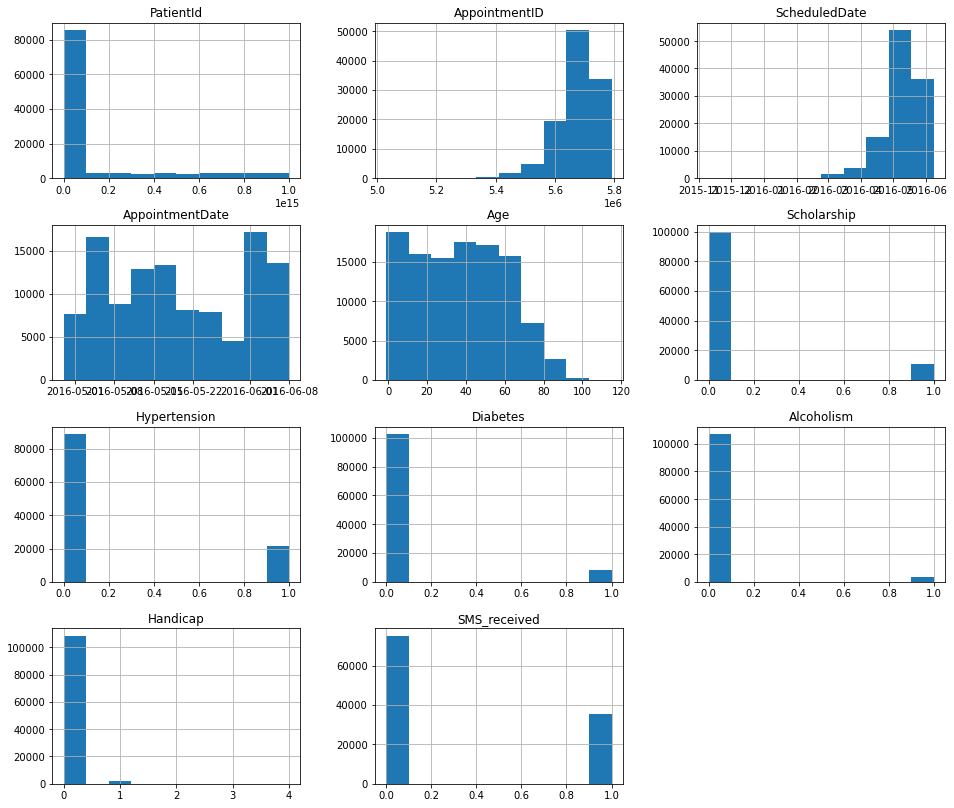

In [76]:
##visualization of the data to see the distribution
no_show.hist(figsize= (16, 14))

### 1. No-show Appointment(How many patients missed their Appointments?)

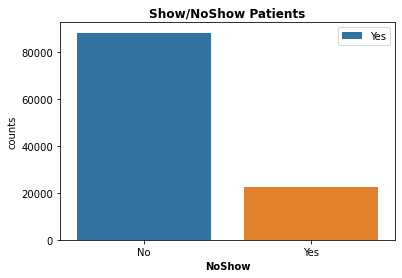

In [56]:
#plotting show/no-show Appointment
ax = sns.countplot(x=no_show.Noshow, data=no_show)
plt.xlabel('NoShow', fontweight ='bold')
plt.ylabel('counts')
ax.set_title("Show/NoShow Patients", fontweight = 'bold')
plt.legend(['no'])
plt.show()

The above visual show around 110,000 number of patients and 88,000 of them showed up for their appointment which makes its 80%.
20% of the patients didn't show up for their appointments.

### 2. Does the age of the patient affect the likelihood of no-show appointment?

In [57]:
#details on 'Age'
no_show.describe().Age

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [58]:
no_show['Age']

0         62
1         56
2         62
3          8
4         56
          ..
110522    56
110523    51
110524    21
110525    38
110526    54
Name: Age, Length: 110527, dtype: int64

In [59]:
#checking details of patients with 'Age' -1 and 0
print("Patients with `Age` less than -1 -> {}".format(no_show[no_show.Age == -1].shape[0]))
print("Patients with `Age` equal to 0 -> {}".format(no_show[no_show.Age == 0].shape[0]))

Patients with `Age` less than -1 -> 1
Patients with `Age` equal to 0 -> 3539


In [60]:
#Assumed age -1 was a typo and delete
no_show = no_show[no_show.Age >= 0]

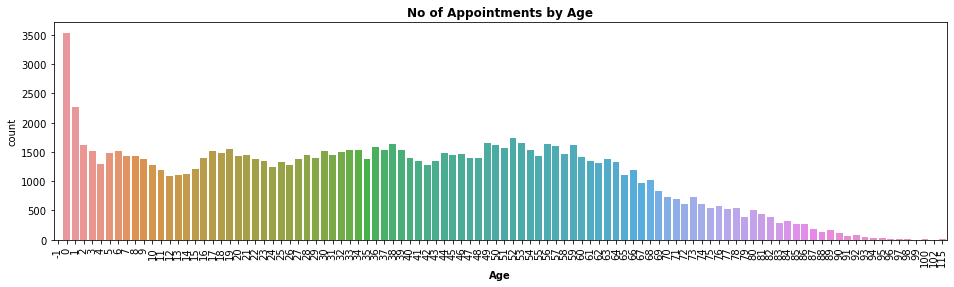

In [9]:
#patients distribution by 'Age'
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.countplot(x=no_show.Age)
plt.xlabel('Age', fontweight = 'bold')
ax.set_title("No of Appointments by Age", fontweight = 'bold')
plt.show()

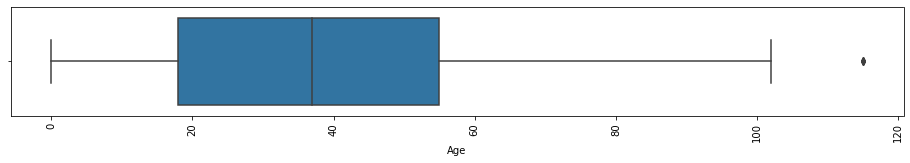

In [75]:
#boxplot for the Age to check it's distribution
plt.figure(figsize=(16,2))
plt.xticks(rotation=90)
_ = sns.boxplot(x=no_show.Age)

In [21]:
#categorise the Age into different groups for better understanding of the distribution
no_show['Age_group'] = pd.cut(no_show.Age, 
                              bins=[0,10,19,26,36,46,56,65,120], labels=['Less than 10', '10-18','19-25','26-35','36-45','46-65','56-65', '66 and Above'])
no_show.head()

,Gender,ScheduledDate,AppointmentDate,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Noshow,Age_group
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,56-65
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,46-65
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,56-65
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Less than 10
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,46-65


This visuals displays the distribution of 'Ages' of different patients.Kids and Patients 'Age' 40-60 show they have a high number of appointments.

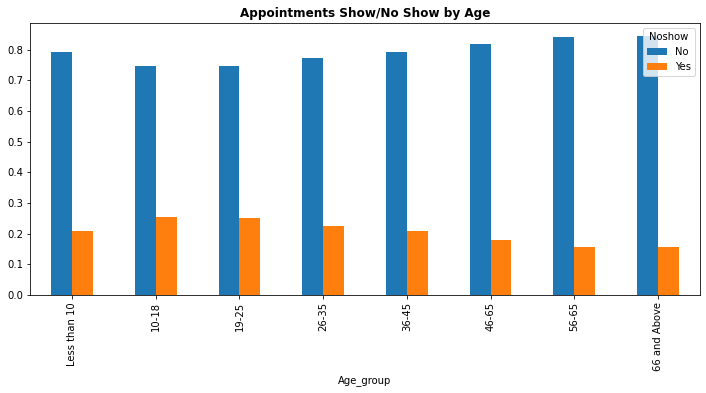

In [41]:
age = no_show.groupby('Age_group')['Noshow'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(12,5))
age.set_title("Appointments Show/No Show by Age", fontweight = 'bold')
plt.show()

This show that adults have the highest number of appointments and also highest 'no-show' to appointments as compared to all the other 'Age_group'

### 3. Which Gender has a higher No Show?

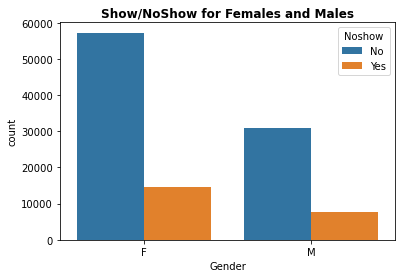

In [28]:
#visualization of gender 
ax = sns.countplot(x='Gender', hue='Noshow', data=no_show)
plt.title("Show/NoShow for Females and Males", fontweight = 'bold')
plt.xlabels=['Female', 'Male']
plt.show()

The figure shows out of the 88,000 patients that have turned up, around 58,000 of them are Females and 30,000 are Males.
'Male' have reduced number of appointments as compare to the 'Female' and the show/noshow distribution is the same for both genders.
Of the 22,500 patients that haven't come for the visit around 15,000 are Females and 7,500 are Males.

### 4. Do patients with scholarship have a higher no-show to appointments?


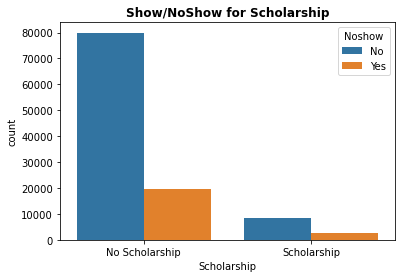

In [29]:
#visualization for patients with scholarship and without scholarship
ax = sns.countplot(x='Scholarship', hue='Noshow', data=no_show)
ax.set_title("Show/NoShow for Scholarship", fontweight ='bold')
x_ticks_labels=['No Scholarship', 'Scholarship']
ax.set_xticklabels(x_ticks_labels)
plt.show()

From the above visualization we see around 100,000 patients without Scholarship, and out of them, around 80% showed to their appointments. Out of the 10,000 patients with Scholarship around 40% showed up to their appoinments. So, Scholarship feature could help us in determining if a patient will turn up for the visit after an appointment.

<a id='conclusions'></a>
## Conclusions 
 ##### Results: Our data suggest

>1. Female patients usually have more appointments than Male patients and the distribution is even for both genders. Therefore, Gender might be an important factor to determine if a patient comes for a visit or not. 
>2. There is no big difference between distribution of Age between patients who showed up at the appointment versus the patients the did not show up at the appointment.
>3. On average, 20% of appointments were missed.
>4. The patients are 37 years on average. 25% of patients are below 18 and most of them are below 55. 
>5. Being enrolled in a scholarship program does not seen to make people more likely to show up for appointments

<a id='limitation'></a>
## Limitation

###### There is a couple of limitations with our data

>1. There is a data range problem in the dataset. The age value cannot be below 0, and there are some very old people as well to be investigated.
>2. Most of the variables are categorical, which does not allow for a high level of statistical method that can be used to provide correlation.
>3. Another very important thing that was missing from the data is the Time details in the AppointmentDay which would really help us a lot in predicting NoShow of a patient. As we have the time detail for ScheduledDay, we should have saved the similar thing in AppointmentDay also and not just normalize it.
>4. A reason for the appointment and the consultation doctor specialization would have helped us a lot in making better analysis and predictions for the NoShow of a patient.
>5. The statistics used here is descriptive statistics, not inferential, meaning that we did not create any hypothesis or controlled experiments on inferences with our data.

<a id='reference'></a>
## Reference

>https://www.delftstack.com/howto/seaborn/stacked-barplots-seaborn/

>https://www.geeksforgeeks.org/countplot-using-seaborn-in-python/

>https://www.machinelearningplus.com/plots/matplotlib-tutorial-complete-guide-python-plot-examples/